In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("D:\\OASIS\\Projects\\Iris\\Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.shape

(150, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


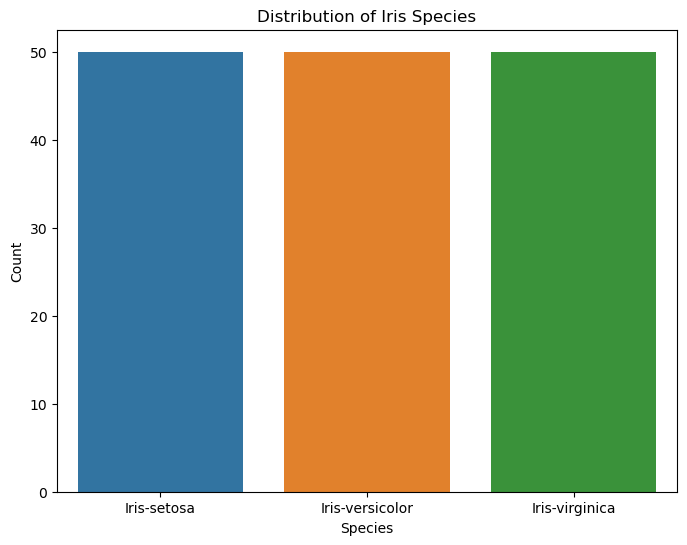

In [7]:
# Count the occurrences of each species
species_counts = data['Species'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=species_counts.index, y=species_counts.values)
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [8]:
# Drop the 'Id' column as it is not useful for modeling
data.drop('Id', axis=1, inplace=True)

In [9]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['Species']= label_encoder.fit_transform(data['Species']) 
  
data['Species'].unique() 

array([0, 1, 2])

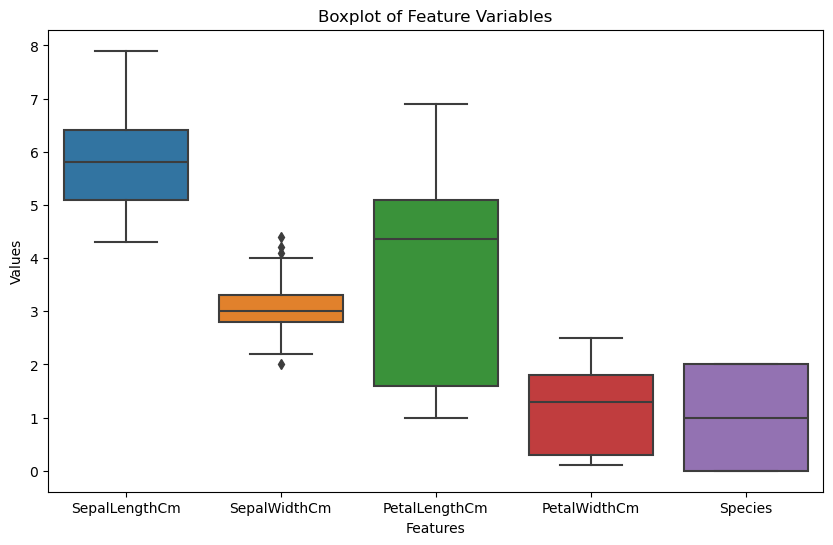

In [11]:
# Plotting boxplots for each feature variable in X to check outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data)
plt.title('Boxplot of Feature Variables')
plt.xlabel('Features')
plt.ylabel('Values')
#plt.xticks(rotation=45)
plt.show()

In [17]:
# Define a function to remove outliers based on z-score
df=data
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    return df[(z_scores < threshold).all(axis=1)]

# Remove outliers from X
data_no_outliers = remove_outliers_zscore(data)

# Print the shape before and after removing outliers
print("Shape of data before removing outliers:", data)
print("Shape of data after removing outliers:", data_no_outliers.shape)


Shape of data before removing outliers:      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        0
1              4.9           3.0            1.4           0.2        0
2              4.7           3.2            1.3           0.2        0
3              4.6           3.1            1.5           0.2        0
4              5.0           3.6            1.4           0.2        0
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2

[150 rows x 5 columns]
Shape of data after removing outliers: (149, 5)


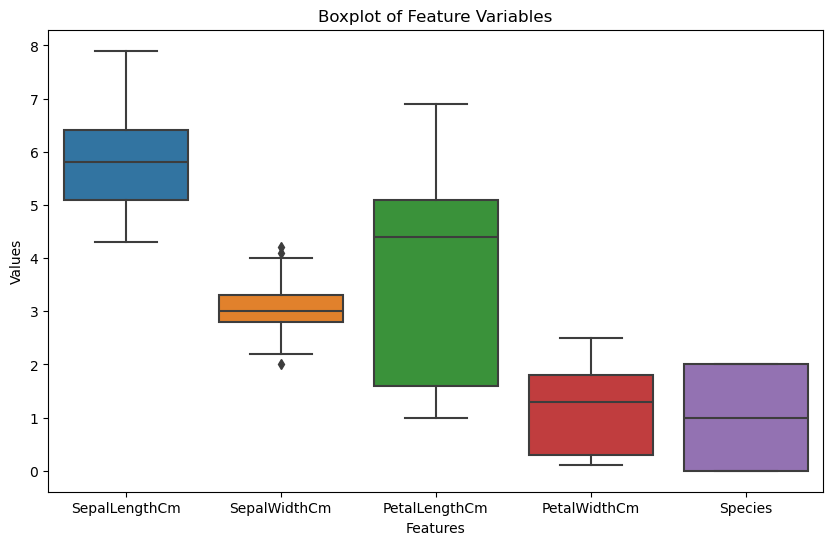

In [18]:
# Plotting boxplots for each feature variable in X to check outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data_no_outliers)
plt.title('Boxplot of Feature Variables')
plt.xlabel('Features')
plt.ylabel('Values')
#plt.xticks(rotation=45)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

In [19]:
# Splitting data into features and target
X = data_no_outliers.drop('Species', axis=1)
y = data_no_outliers['Species']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 0)
print(X_train.shape)
print(X_test.shape)

(111, 4)
(38, 4)


In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3,random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [25]:
print("Train Score : ", model.score(X_train,y_train))
print("Test Score : ", model.score(X_test,y_test))

Train Score :  1.0
Test Score :  0.868421052631579


In [28]:
# Predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [29]:
# Accuracy
print("Training Accuracy:", accuracy_score(y_train, train_preds))
print("Testing Accuracy:", accuracy_score(y_test, test_preds))

Training Accuracy: 1.0
Testing Accuracy: 0.868421052631579


In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Classification Report
print("Classification Report for Testing Data:")
print(classification_report(y_test, test_preds))

Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.76      0.93      0.84        14
           2       0.86      0.60      0.71        10

    accuracy                           0.87        38
   macro avg       0.87      0.84      0.85        38
weighted avg       0.88      0.87      0.86        38



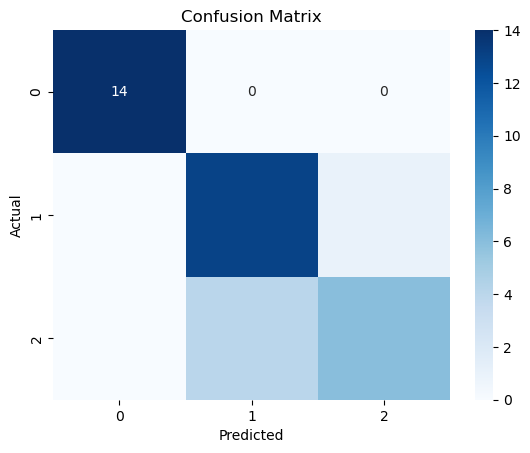

In [32]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, test_preds), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

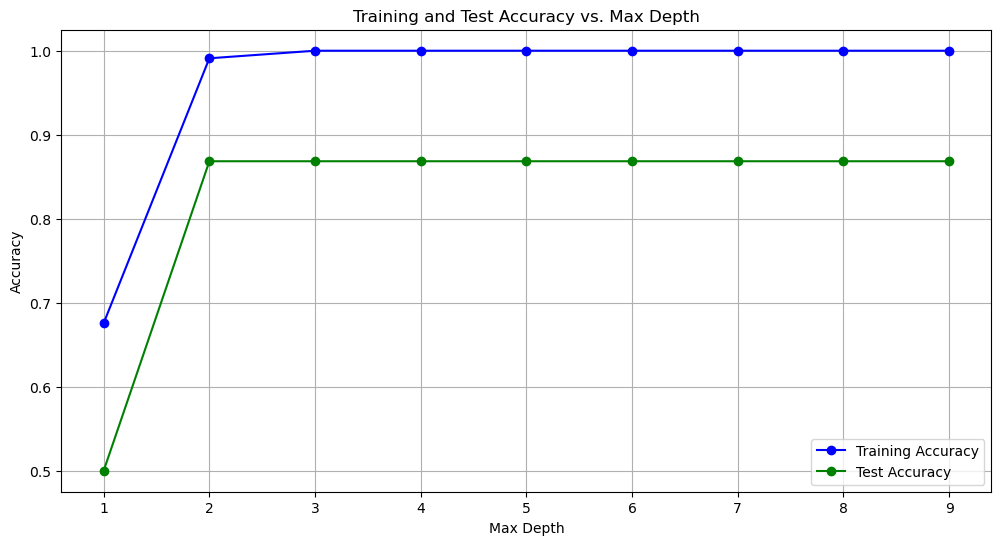

In [33]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize lists to store accuracy values
train_accuracy = []
test_accuracy = []

# Iterate through different max_depth values
max_depth_range = range(1, 10)
for i in max_depth_range:
    # Create and train the model
    model = DecisionTreeClassifier(max_depth=i, random_state=0)
    model.fit(X_train, y_train)
    
    # Calculate training accuracy
    train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_accuracy.append(train_acc)
    
    # Calculate test accuracy
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_accuracy.append(test_acc)

# Plot the training and test accuracy
plt.figure(figsize=(12, 6))
plt.plot(max_depth_range, train_accuracy, label='Training Accuracy', marker='o', linestyle='-', color='blue')
plt.plot(max_depth_range, test_accuracy, label='Test Accuracy', marker='o', linestyle='-', color='green')
plt.title('Training and Test Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# Collect user input
user_input = input("Enter values for sepal length, sepal width, petal length, and petal width separated by spaces: ")

# Preprocess user input
user_input = [float(x) for x in user_input.split()]  # Convert input to a list of floats

# Create a DataFrame for the user input
user_input_df = pd.DataFrame([user_input], columns=data.drop('Species', axis=1).columns)

# Use the trained model to predict the class label for the user input
predicted_class = model.predict(user_input_df)

# Map the predicted class label to the corresponding class name
predicted_class_name = label_encoder.inverse_transform(predicted_class)

# Print the predicted class name
print(f"The predicted class for the input is: {predicted_class_name[0]}")


Enter values for sepal length, sepal width, petal length, and petal width separated by spaces: 1 2 3 4
The predicted class for the input is: Iris-virginica
